In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/housing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='median_house_value'>

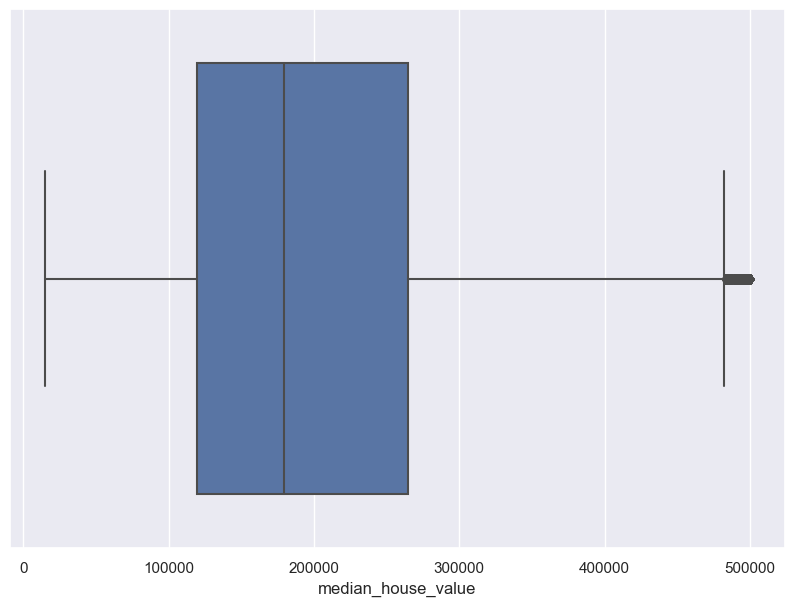

In [5]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x=df["median_house_value"])

In [6]:
df.shape

(20640, 10)

In [9]:
new_df = df.copy()

In [36]:
new_df = df.copy()
def IQR(column_name):
    Q1 = new_df[column_name].quantile(0.25)
    Q3 = new_df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    values_upper = new_df[new_df[column_name] > upper_limit]
    values_lower = new_df[new_df[column_name] < lower_limit]
    
    return values_upper, values_lower, upper_limit, lower_limit

# this function will delete any outliers upper or lower the limit
def outliers_del(column_name):
    # we will make new_df global to consider the global variable not the local
    global new_df
    new_df = new_df[new_df[column_name] < upper_limit]
    new_df = new_df[new_df[column_name] > lower_limit]
    print("the old data shape is :", df.shape)
    print("the new data shape is :", new_df.shape)
    
    
def upper(column_name):
    if values_upper.shape[0] > 0:
        print("Outliers upper than the higher limit: ")
        return new_df[new_df[column_name] > upper_limit]
    else:
        print("There are no values higher than the upper limit!")
        
        
        
def lower(column_name):
    if values_lower.shape[0] > 0:
        print("Outliers lower than the higher limit: ")
        return new_df[new_df[column_name] < lower_limit]
    else:
        print("There are no values lower than the lower limit!")
        
        
def outlier_compare(column_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,1)
    sns.boxplot(x=new_df["median_house_value"])
    plt.subplot(2,2,2)
    sns.boxplot(x=df["median_house_value"])
    plt.show()

    

In [24]:
values_upper, values_lower, upper_limit, lower_limit = IQR('median_house_value')

In [41]:
values_upper

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1565,-121.93,37.78,2.0,227.0,35.0,114.0,49.0,3.1591,434700.0,<1H OCEAN
1580,-122.02,37.87,14.0,3056.0,369.0,1209.0,377.0,8.4352,441400.0,NEAR BAY
1629,-122.16,37.89,32.0,1779.0,241.0,721.0,258.0,8.7589,434500.0,NEAR BAY
1632,-122.17,37.87,38.0,1261.0,177.0,472.0,183.0,6.9170,438000.0,NEAR BAY
1913,-120.06,39.01,19.0,2967.0,528.0,112.0,48.0,4.0714,437500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
18383,-121.80,37.19,45.0,1797.0,303.0,870.0,281.0,4.5417,434500.0,<1H OCEAN
18476,-121.66,37.11,19.0,3785.0,611.0,2198.0,610.0,5.1514,436700.0,<1H OCEAN
18620,-122.03,37.00,30.0,2077.0,342.0,816.0,328.0,5.2078,440500.0,NEAR OCEAN
19412,-121.01,37.74,14.0,2368.0,297.0,796.0,301.0,8.7783,435000.0,INLAND


In [25]:
upper('median_house_value')

Outliers upper than the higher limit: 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1565,-121.93,37.78,2.0,227.0,35.0,114.0,49.0,3.1591,434700.0,<1H OCEAN
1580,-122.02,37.87,14.0,3056.0,369.0,1209.0,377.0,8.4352,441400.0,NEAR BAY
1629,-122.16,37.89,32.0,1779.0,241.0,721.0,258.0,8.7589,434500.0,NEAR BAY
1632,-122.17,37.87,38.0,1261.0,177.0,472.0,183.0,6.9170,438000.0,NEAR BAY
1913,-120.06,39.01,19.0,2967.0,528.0,112.0,48.0,4.0714,437500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
18383,-121.80,37.19,45.0,1797.0,303.0,870.0,281.0,4.5417,434500.0,<1H OCEAN
18476,-121.66,37.11,19.0,3785.0,611.0,2198.0,610.0,5.1514,436700.0,<1H OCEAN
18620,-122.03,37.00,30.0,2077.0,342.0,816.0,328.0,5.2078,440500.0,NEAR OCEAN
19412,-121.01,37.74,14.0,2368.0,297.0,796.0,301.0,8.7783,435000.0,INLAND


In [31]:
lower('median_house_value')

There are no values lower than the lower limit!


In [26]:
outliers_del('median_house_value')

the old data shape is : (20640, 10)
the new data shape is : (19210, 10)


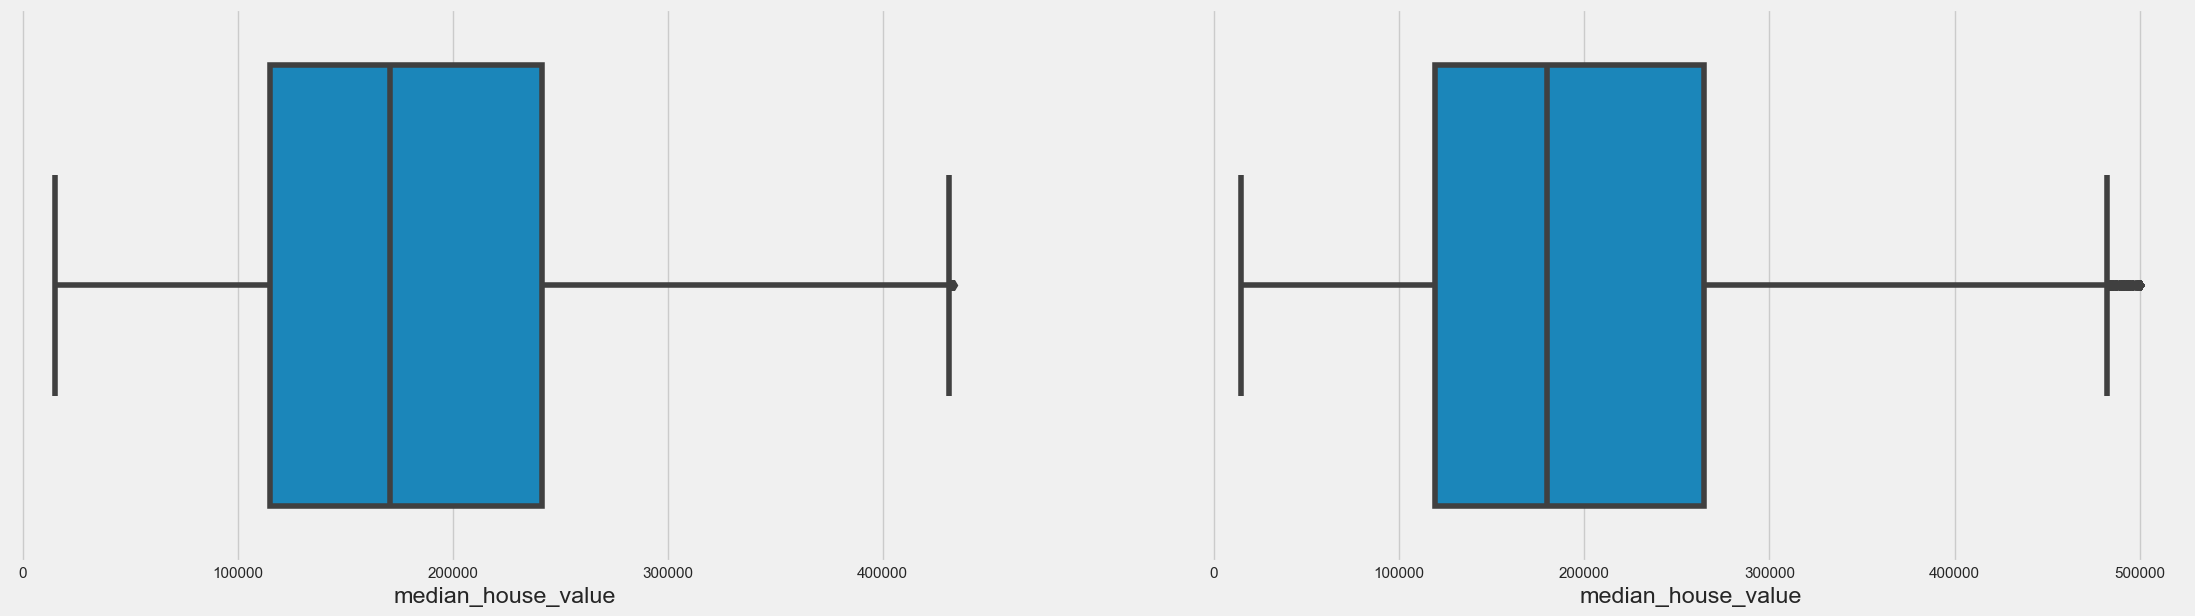

In [37]:
outlier_compare('median_house_value')

<Axes: xlabel='median_house_value', ylabel='Count'>

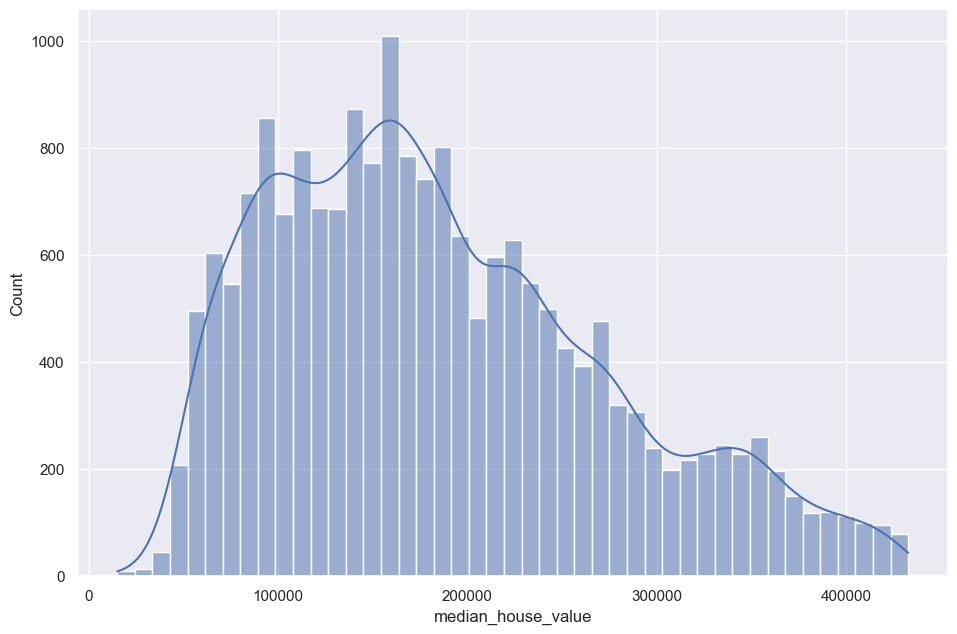

In [33]:
sns.histplot(data=new_df, x="median_house_value", kde=True)